# Feature Selection & Correlation

## Title: Feature Scaling, Selection, and Constant Column Removal in Machine Learning with the Breast Cancer Dataset

## Objective: In this assignment, you will learn how to preprocess and select features in machine learning using Python. You will practice techniques such as feature scaling, feature selection using correlation analysis, and removal of constant columns with the breast cancer dataset from scikit-learn.

### Tasks:

### 1. Import the necessary libraries: Start by importing the required libraries, including pandas, numpy, matplotlib, scikit-learn, and seaborn.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

### 2. Load the dataset: Load the breast cancer dataset into a pandas DataFrame using the load_breast_cancer() function from scikit-learn (sklearn.datasets()).

In [2]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

df = pd.DataFrame(data.data, columns=data.feature_names)

df['target'] = data.target

In [3]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
# Checking Null Values

df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [7]:
# X - independent variables
# Y - dependen variable ("Target Column")

X = df.drop("target", axis=1)
Y = df["target"]

### 3. Remove constant columns: Remove any columns in the dataset that have constant values.

In [8]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold = 0.01) # threshold = 0.01 --> means dropping column where 99% values are similar

In [9]:
vt.fit(X)

VarianceThreshold(threshold=0.01)

In [10]:
vt.get_support()

array([ True,  True,  True,  True, False, False, False, False, False,
       False,  True,  True,  True,  True, False, False, False, False,
       False, False,  True,  True,  True,  True, False,  True,  True,
       False, False, False])

In [11]:
covariance_cols = list(X.columns[vt.get_support() == False])
covariance_cols

['mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst smoothness',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [12]:
len(covariance_cols)

16

In [13]:
# Dropping the columns in the dataset (X) that have constant values

X.drop(covariance_cols, axis=1, inplace=True)

In [14]:
X.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst compactness', 'worst concavity'],
      dtype='object')

### 4. Encode categorical features: If the dataset contains any categorical features, encode them using one-hot encoding or label encoding.

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   mean radius        569 non-null    float64
 1   mean texture       569 non-null    float64
 2   mean perimeter     569 non-null    float64
 3   mean area          569 non-null    float64
 4   radius error       569 non-null    float64
 5   texture error      569 non-null    float64
 6   perimeter error    569 non-null    float64
 7   area error         569 non-null    float64
 8   worst radius       569 non-null    float64
 9   worst texture      569 non-null    float64
 10  worst perimeter    569 non-null    float64
 11  worst area         569 non-null    float64
 12  worst compactness  569 non-null    float64
 13  worst concavity    569 non-null    float64
dtypes: float64(14)
memory usage: 62.4 KB


In [16]:
X.select_dtypes(include="object").columns

# As the list is empty, we can conclude that there is no categorical features in the dataset (X) so, no need to perform one-hot encoding or label encoding.

Index([], dtype='object')

### 5. Feature scaling: Scale the numerical features using scikit-learn's StandardScaler or MinMaxScaler function.

In [17]:
# Scaling --> normalization (MinMaxScaler)

from sklearn.preprocessing import MinMaxScaler

numeric_columns = X.select_dtypes(include=['float64']).columns

scaler = MinMaxScaler()

X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

In [18]:
X

,mean radius,mean texture,mean perimeter,mean area,radius error,texture error,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area,worst compactness,worst concavity
0,0.521037,0.022658,0.545989,0.363733,0.356147,0.120469,0.369034,0.273811,0.620776,0.141525,0.668310,0.450698,0.619292,0.568610
1,0.643144,0.272574,0.615783,0.501591,0.156437,0.082589,0.124440,0.125660,0.606901,0.303571,0.539818,0.435214,0.154563,0.192971
2,0.601496,0.390260,0.595743,0.449417,0.229622,0.094303,0.180370,0.162922,0.556386,0.360075,0.508442,0.374508,0.385375,0.359744
3,0.210090,0.360839,0.233501,0.102906,0.139091,0.175875,0.126655,0.038155,0.248310,0.385928,0.241347,0.094008,0.814012,0.548642
4,0.629893,0.156578,0.630986,0.489290,0.233822,0.093065,0.220563,0.163688,0.519744,0.123934,0.506948,0.341575,0.172415,0.319489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.385479,0.197976,0.325873,0.283710,0.623266,0.383262,0.576174,0.452664,0.178527,0.328035
565,0.622320,0.626987,0.604036,0.474019,0.236828,0.464728,0.209490,0.172279,0.560655,0.699094,0.520892,0.379915,0.159997,0.256789
566,0.455251,0.621238,0.445788,0.303118,0.124896,0.157974,0.125713,0.077976,0.393099,0.589019,0.379949,0.230731,0.273705,0.271805
567,0.644564,0.663510,0.665538,0.475716,0.222524,0.272896,0.236300,0.148335,0.633582,0.730277,0.668310,0.402035,0.815758,0.749760


### 6. Correlation analysis: Use seaborn's heatmap() function to plot a heatmap of the correlation matrix between the features. Identify highly correlated features and remove one of them.

In [19]:
X.corr()

,mean radius,mean texture,mean perimeter,mean area,radius error,texture error,perimeter error,area error,worst radius,worst texture,worst perimeter,worst area,worst compactness,worst concavity
mean radius,1.000000,0.323782,0.997855,0.987357,0.679090,-0.097317,0.674172,0.735864,0.969539,0.297008,0.965137,0.941082,0.413463,0.526911
mean texture,0.323782,1.000000,0.329533,0.321086,0.275869,0.386358,0.281673,0.259845,0.352573,0.912045,0.358040,0.343546,0.277830,0.301025
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.691765,-0.086761,0.693135,0.744983,0.969476,0.303038,0.970387,0.941550,0.455774,0.563879
mean area,0.987357,0.321086,0.986507,1.000000,0.732562,-0.066280,0.726628,0.800086,0.962746,0.287489,0.959120,0.959213,0.390410,0.512606
radius error,0.679090,0.275869,0.691765,0.732562,1.000000,0.213247,0.972794,0.951830,0.715065,0.194799,0.719684,0.751548,0.287103,0.380585
texture error,-0.097317,0.386358,-0.086761,-0.066280,0.213247,1.000000,0.223171,0.111567,-0.111690,0.409003,-0.102242,-0.083195,-0.092439,-0.068956
perimeter error,0.674172,0.281673,0.693135,0.726628,0.972794,0.223171,1.000000,0.937655,0.697201,0.200371,0.721031,0.730713,0.341919,0.418899
area error,0.735864,0.259845,0.744983,0.800086,0.951830,0.111567,0.937655,1.000000,0.757373,0.196497,0.761213,0.811408,0.283257,0.385100
worst radius,0.969539,0.352573,0.969476,0.962746,0.715065,-0.111690,0.697201,0.757373,1.000000,0.359921,0.993708,0.984015,0.475820,0.573975
worst texture,0.297008,0.912045,0.303038,0.287489,0.194799,0.409003,0.200371,0.196497,0.359921,1.000000,0.365098,0.345842,0.360832,0.368366


<Axes: >

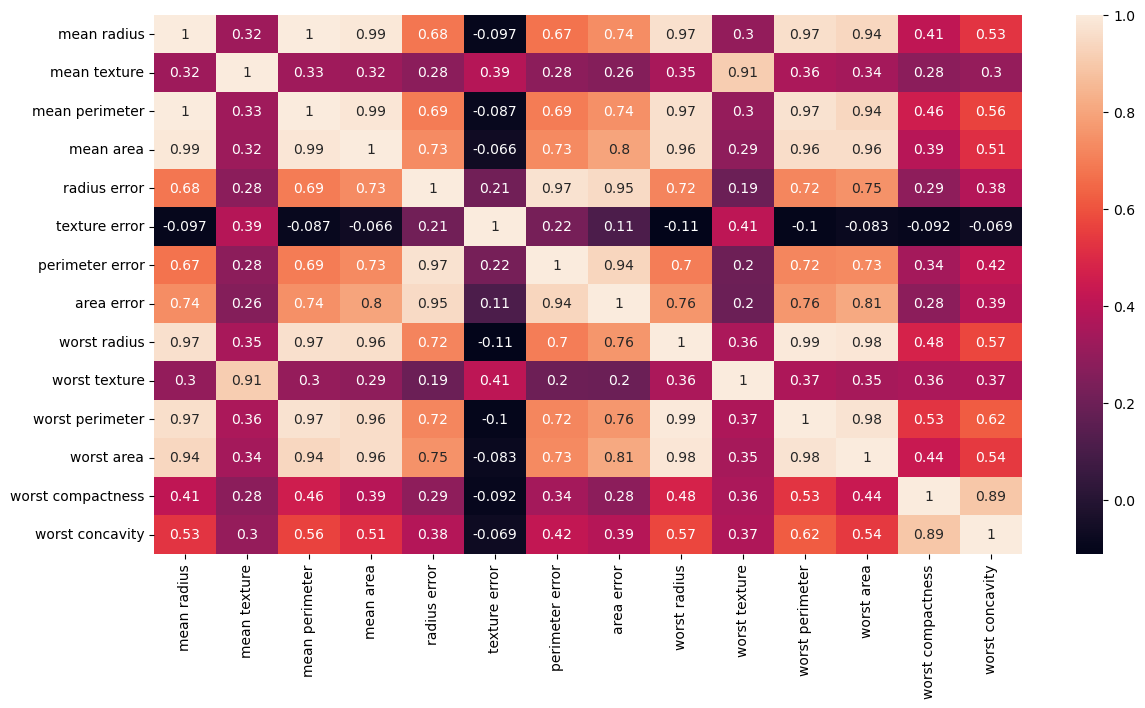

In [20]:
plt.figure(figsize=(14,7))
sns.heatmap(X.corr(), annot=True)

In [21]:
def corr_columns(dataset, threshold):
    corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if corr_matrix.iloc[i,j] > threshold:
                corr.add(corr_matrix.columns[i])
    return corr

In [22]:
corr_cols = corr_columns(X, 0.98) # threshold > 0.98 --> Highly Positive Correlation
corr_cols

{'mean area', 'mean perimeter', 'worst area', 'worst perimeter'}

In [23]:
# Dropping columns having threshold > 0.98 --> {'mean area', 'mean perimeter', 'worst area', 'worst perimeter'}

X.drop(list(corr_cols), axis=1, inplace=True)

In [24]:
X.columns

Index(['mean radius', 'mean texture', 'radius error', 'texture error',
       'perimeter error', 'area error', 'worst radius', 'worst texture',
       'worst compactness', 'worst concavity'],
      dtype='object')

### 7. Feature selection: Use scikit-learn's SelectKBest or SelectPercentile function to select the k best or top percentile features based on their correlation with the target variable.

In [25]:
# SelectPercentile

from sklearn.feature_selection import SelectPercentile, mutual_info_classif

In [26]:
# Select the top 20% features based on their mutual information with the target variable

percentile_selector = SelectPercentile(mutual_info_classif, percentile=20)

# X - independent column
# Y - dependent column --> target

percentile_selector.fit_transform(X, Y)

array([[0.52103744, 0.62077552],
       [0.64314449, 0.60690146],
       [0.60149557, 0.55638563],
       ...,
       [0.45525108, 0.39309854],
       [0.64456434, 0.63358236],
       [0.03686876, 0.05428673]])

In [27]:
list(X.columns[percentile_selector.get_support() == True])

['mean radius', 'worst radius']

### 8. Bonus: Choose a different dataset and perform feature scaling, selection, and constant column removal using different techniques. Be creative!

In [28]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold

In [29]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
Y = iris.target

In [30]:
# Convert to a DataFrame

columns = ["Sepal Length (in cm)", "Sepal Width (in cm)", "Petal Length (in cm)", "Petal Width (in cm)"]
df = pd.DataFrame(X, columns=columns)
df['Target'] = Y

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Sepal Length (in cm)  150 non-null    float64
 1   Sepal Width (in cm)   150 non-null    float64
 2   Petal Length (in cm)  150 non-null    float64
 3   Petal Width (in cm)   150 non-null    float64
 4   Target                150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [32]:
# Checking Null Values

df.isnull().sum()

Sepal Length (in cm)    0
Sepal Width (in cm)     0
Petal Length (in cm)    0
Petal Width (in cm)     0
Target                  0
dtype: int64

In [33]:
# Separating Target column

# X --> independent column
# Y --> dependent column

X = df.drop("Target", axis=1)
Y = df["Target"]

In [34]:
X

,Sepal Length (in cm),Sepal Width (in cm),Petal Length (in cm),Petal Width (in cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [35]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Target, Length: 150, dtype: int32

In [36]:
# Feature scaling using Min-Max scaling

scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(X), columns=columns)

In [37]:
df_scaled

,Sepal Length (in cm),Sepal Width (in cm),Petal Length (in cm),Petal Width (in cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [38]:
# Constant column removal using VarianceThreshold

vt = VarianceThreshold(threshold=0.2)

vt.fit_transform(X)

array([[5.1, 1.4, 0.2],
       [4.9, 1.4, 0.2],
       [4.7, 1.3, 0.2],
       [4.6, 1.5, 0.2],
       [5. , 1.4, 0.2],
       [5.4, 1.7, 0.4],
       [4.6, 1.4, 0.3],
       [5. , 1.5, 0.2],
       [4.4, 1.4, 0.2],
       [4.9, 1.5, 0.1],
       [5.4, 1.5, 0.2],
       [4.8, 1.6, 0.2],
       [4.8, 1.4, 0.1],
       [4.3, 1.1, 0.1],
       [5.8, 1.2, 0.2],
       [5.7, 1.5, 0.4],
       [5.4, 1.3, 0.4],
       [5.1, 1.4, 0.3],
       [5.7, 1.7, 0.3],
       [5.1, 1.5, 0.3],
       [5.4, 1.7, 0.2],
       [5.1, 1.5, 0.4],
       [4.6, 1. , 0.2],
       [5.1, 1.7, 0.5],
       [4.8, 1.9, 0.2],
       [5. , 1.6, 0.2],
       [5. , 1.6, 0.4],
       [5.2, 1.5, 0.2],
       [5.2, 1.4, 0.2],
       [4.7, 1.6, 0.2],
       [4.8, 1.6, 0.2],
       [5.4, 1.5, 0.4],
       [5.2, 1.5, 0.1],
       [5.5, 1.4, 0.2],
       [4.9, 1.5, 0.2],
       [5. , 1.2, 0.2],
       [5.5, 1.3, 0.2],
       [4.9, 1.4, 0.1],
       [4.4, 1.3, 0.2],
       [5.1, 1.5, 0.2],
       [5. , 1.3, 0.3],
       [4.5, 1.3

In [39]:
vt.get_support()

array([ True, False,  True,  True])

In [40]:
selected_features_no_const = list(X.columns[vt.get_support() == True])

In [41]:
selected_features_no_const

['Sepal Length (in cm)', 'Petal Length (in cm)', 'Petal Width (in cm)']

In [42]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(df_scaled, Y, test_size=0.2, random_state=42)

In [43]:
print(X_train.shape, X_test.shape)

(120, 4) (30, 4)


In [44]:
print(y_train.shape, y_test.shape)

(120,) (30,)


In [45]:
# Feature selection using Recursive Feature Elimination (RFE)

rf_classifier = RandomForestClassifier(n_estimators=10, random_state=42)

rfe_selector = RFE(rf_classifier, n_features_to_select=2)
X_train_rfe = rfe_selector.fit_transform(X_train, y_train)

selected_features_rfe = X_train.columns[rfe_selector.support_]

In [46]:
# Display the results

print("Original DataFrame:\n")
print(df.head())

Original DataFrame:

   Sepal Length (in cm)  Sepal Width (in cm)  Petal Length (in cm)  \
0                   5.1                  3.5                   1.4   
1                   4.9                  3.0                   1.4   
2                   4.7                  3.2                   1.3   
3                   4.6                  3.1                   1.5   
4                   5.0                  3.6                   1.4   

   Petal Width (in cm)  Target  
0                  0.2       0  
1                  0.2       0  
2                  0.2       0  
3                  0.2       0  
4                  0.2       0  


In [47]:
print("\nDataFrame after Min-Max scaling:\n")
print(df_scaled.head())


DataFrame after Min-Max scaling:

   Sepal Length (in cm)  Sepal Width (in cm)  Petal Length (in cm)  \
0              0.222222             0.625000              0.067797   
1              0.166667             0.416667              0.067797   
2              0.111111             0.500000              0.050847   
3              0.083333             0.458333              0.084746   
4              0.194444             0.666667              0.067797   

   Petal Width (in cm)  
0             0.041667  
1             0.041667  
2             0.041667  
3             0.041667  
4             0.041667  


In [48]:
print("\nSelected features using RFE:\n")
print(list(selected_features_rfe))


Selected features using RFE:

['Petal Length (in cm)', 'Petal Width (in cm)']


In [49]:
print("\nSelected features after removing constant columns:\n")
print(list(selected_features_no_const))


Selected features after removing constant columns:

['Sepal Length (in cm)', 'Petal Length (in cm)', 'Petal Width (in cm)']
